In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 168 (delta 2), reused 0 (delta 0), pack-reused 161
Receiving objects: 100% (168/168), 74.99 MiB | 11.34 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (54/54), done.


## МЕТРИКИ КАЧЕСТВА
В задачах машинного обучения мы хотим сравнивать несколько моделей машинного обучения и выбирать наилучшую из них. Решение о том, какая модель хорошая, а какая плохая, принимается на основе одной или нескольких метрик моделей машинного обучения.
Без метрик обучение моделей вообще теряет всякий смысл – как же определить, какая из списка обученных моделей хорошая, а какая плохая? Давайте разберёмся, как определить лучшую модель с помощью математики.


# Оценка качества линейной регрессии

В случае регрессии модель оценивается довольно просто. Хорошо обученная модель регрессии дает прогнозные значения, близкие к наблюдаемым. В отсутствие информативных признаков обычно используется модель средних (`mean model`), которая всегда прогнозирует средние значения меток в обучающих данных.  
Соответственно, оцениваемая регрессионная модель должна быть лучше модели средних. Если это так, тогда на следующем шаге сравнивается эффективность модели на обучающих и тестовых данных.
Давайте вернёмся к представлению линейной регрессии. От каждой красной точки до синей линии отложены отрезки, которые представляют собой ошибку регрессии – как сильно модель ошибается на каждой из точек.

![img](https://drive.google.com/uc?id=1rMJY-OCwEnYr7mrg0SA_r_lnhv5oBwdh)


Понимание метриками очень простое – усредним отклонения по всем точкам и получим одно число – метрику качества линейной регрессии, т.е. насколько модель отклоняется от реальных данных.
Метрики принимают на вход два вектора, предсказания модели и истинные значения, после чего вычисляют по этим векторам качество модели. Выделяют следующе метрики:

•	Средняя абсолютная ошибка (MAE)

•	Средняя квадратическая ошибка (MSE)

•	Среднеквадратическая ошибка (RMSE)

•	R в квадрате (R²)

•	Скорректированный R квадрат (R²)

•	Среднеквадратичная ошибка в процентах (MSPE)

•	Средняя абсолютная ошибка в процентах (MAPE)

•	Среднеквадратичная логарифмическая ошибка (RMSLE)


## Средняя абсолютная ошибка (MAE)
В MAE ошибка рассчитывается как среднее абсолютных разностей между целевыми значениями и прогнозами. MAE – это линейная оценка, которая означает, что все индивидуальные различия взвешены одинаково в среднем. Например, разница между 10 и 0 будет вдвое больше разницы между 5 и 0. Однако то же самое не верно для RMSE. Математически он рассчитывается по следующей формуле:

![img](https://drive.google.com/uc?id=18fEw6Yfvd1-9aDdBoBHoXs-itv3Rjt4i)


где $y_{i}$ – фактический ожидаемый результат, $y-_{i}$  – это прогноз модели.
Таким образом, метрика не так чувствителен к выбросам, как среднеквадратическая ошибка.
MAE широко используется в финансах, где ошибка в 10 долларов обычно в два раза хуже, чем ошибка в 5 долларов. С другой стороны, метрика MSE считает, что ошибка в 10 долларов в четыре раза хуже, чем ошибка в 5 долларов.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load data
data = pd.read_csv('/content/SPO_PGU/diabetes.csv')
X=data.iloc[:,:7]
y=data.iloc[:,8]


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
54,7,150,66,42,342,34.7,0.718
30,5,109,75,26,0,36.0,0.546
424,8,151,78,32,210,42.9,0.516
682,0,95,64,39,105,44.6,0.366
100,1,163,72,0,0,39.0,1.222
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
192,7,159,66,0,0,30.4,0.383
629,4,94,65,22,0,24.7,0.148
559,11,85,74,0,0,30.1,0.300


In [ ]:
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, Y_train)
y_score=y_scor.predict(X_test)

In [ ]:
y_score

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(y_scor.predict(X_test), Y_test))

MAE = 0.21354166666666666


## Средняя квадратическая ошибка (MSE)
Это, пожалуй, самый простой и распространенный показатель для оценки регрессии, но, вероятно, наименее полезный. Определяется уравнением

![img](https://drive.google.com/uc?id=1JHpPmTfkROgobPbW1rR6poicqCjXKdQq)

MSE в основном измеряет среднеквадратичную ошибку наших прогнозов. Для каждой точки вычисляется квадратная разница между прогнозами и целью, а затем усредняются эти значения.
Чем выше это значение, тем хуже модель. Он никогда не бывает отрицательным, поскольку мы возводим в квадрат отдельные ошибки прогнозирования, прежде чем их суммировать, но для идеальной модели это будет ноль.

Если мы сделаем один очень плохой прогноз, возведение в квадрат сделает ошибку еще хуже, и это может исказить метрику в сторону переоценки «плохости» модели. Это особенно проблематичное поведение, если у нас есть зашумленные данные - даже в «идеальной» модели может быть высокий MSE в этой ситуации, поэтому становится трудно судить, насколько хорошо модель выполняет. С другой стороны, если все ошибки малы или, скорее, меньше 1, то ощущается противоположный эффект: мы можем недооценивать недостатки модели.


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_scor.predict(X_test), Y_test)
print('MSE = %s' % mse)


MSE = 0.21354166666666666


На графике видно, что MAE (красная линия) почти всегда меньше по значению, чем MSE (черная линия). Это значит, что MSE более "пессимистична" и сильнее штрафует за большие ошибки - т.е. MSE лучше применять, когда вы уверены что в выборке нет "выборосов" (англ. outliers) - значений, который очень сильно отличаются от остальных точек. Если выбросы есть, лучше применять MAE.

![img](https://drive.google.com/uc?id=1p-K-jrm2Yt0Uu3MvtOYQjaYIzVm392wB)

## Среднеквадратическая ошибка (RMSE)
RMSE - это просто квадратный корень из MSE. Квадратный корень введен, чтобы масштаб ошибок был таким же, как масштаб целей.

![img](https://drive.google.com/uc?id=1Dmp6P7uNxns9ebhZt64MRzi74dqv2W_1)

Это означает, что, если целевым показателем является RMSE, мы все равно можем сравнивать наши модели, используя MSE, поскольку MSE упорядочит модели так же, как RMSE. Таким образом, мы можем оптимизировать MSE вместо RMSE.
На самом деле, с MSE работать немного проще, поэтому все используют MSE вместо RMSE.


## Коэффициент детерминации, или R² (иногда читаемый как R-два),

является еще одним показателем, который мы можем использовать для оценки модели, и он тесно связан с MSE, но имеет преимущество в том, что без масштабное - не имеет значения, являются ли выходные значения очень большими или очень маленькими, R² всегда будет между -∞ и 1.

Наилучшее возможное значение R² – 1.0, чем меньше тем хуже. Если этот коэффициент близок к 1, то условная дисперсия модели (то есть разброс предсказаний модели     относительно разброса самой целевой переменной   ) достаточно мала - то есть модель неплохо описывает данные. Коэффициент может быть даже отрицательным - то это значит, что модель совсем уж плохая.


In [ ]:
from sklearn.metrics import r2_score
print("r2_score = %s" % r2_score(y_scor.predict(X_test), Y_test))


r2_score = -0.1310751104565535


# Оценка качества классификации.

## ROC-анализ.

При решении задач классификации приходится рассматривать несколько моделей или вариантов построения одной модели. Поэтому важно оценивать модели и выбирать лучшие. Рассмотрим оценки погрешностей моделей, решающих задачи классификации.

Эффективность модели, предназначенной для решения задачи классификации, обычно оценивается с помощью коэффициента ошибки (error rate). Если классификатор правильно определяет класс наблюдения, то имеет место успех, в противном случае — ошибка. Коэффициент ошибки — это количество ошибок, допущенных на всем множестве, отнесенное к общему числу наблюдений. Он показывает общую эффективность классификатора.

Ошибки классификатора удобно представлять в графической форме в виде матрицы несоответствий (Confusion Matrix), таблицы сопряженности — матрицы, в которой для каждого класса наблюдений приводятся результаты отнесения наблюдений к тому или иному классу. Английское название (confusion — путаница) возникло потому, что матрица позволяет видеть, путает ли классификатор классы. Столбцы матрицы соответствуют предсказанным классам, а строки — фактическим классам.

![img](https://drive.google.com/uc?id=1XdC9FRBFH9YrFWWTZWQTg2M_jDpqa24e)

В бинарной классификации (когда все объекты разделяются на два класса) каждое отдельное предсказание может иметь четыре исхода:

•	истинноположительный (True Positive, Tp);

•	истинноотрицательный (True Negative, Tn);

•	ложноположительный (False Positive, Fp);

•	ложноотрицательный (False Negative, Fn).

Пусть в качестве положительного исхода выбрано значение Да, а в качестве отрицательного — Нет. Истинноположительным исход будет, когда фактический класс данного примера Да и модель на выходе выдаст Да. Истинноотрицательным исход будет, когда фактический класс наблюдения Нет и модель выдаст Нет. Ложноположительное значение имеет место, когда класс наблюдения Нет, а модель для него сформирует выход Да. При ложноотрицательном выходе целевая переменная принимает значение Да, а на выходе модель выдаст Нет.


Text(0.5, 1.1, 'Confusion matrix\n')

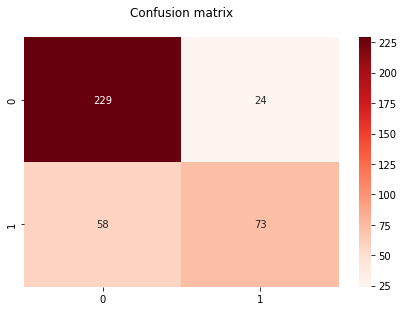

In [ ]:
# Вывод Матрицы ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# матрица неточности
cnf_matrix_log = confusion_matrix(Y_test, y_score)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)


Матрица ошибок для случая многоклассовой классификации имеет число строк и столбцов по числу разных классов. Она может помочь вам определить тенденции в распределении ошибок. Например, матрица ошибок может показать, что модель, обученная распознаванию видов животных, имеет тенденцию ошибочно распознавать «пантеру» как «кошку» или «крысу» как «мышь». В таком случае можно попробовать добавить больше размеченных данных этих видов животных, чтобы помочь алгоритму обучения «увидеть» разницу между ними.

In [ ]:
from sklearn.datasets import load_wine # функция которая загружает набор данных
from sklearn.model_selection import train_test_split # подключаем функцию для разделения данных
from sklearn.svm import SVC # подключаем классификатор
import pandas as pd

data_wine = load_wine() # загружаем набор данных

Z = data_wine.data # в поле data - примеры входов, вектора
Q = data_wine.target # Указания учителя = номера классов


x_train, x_test, y_train, y_test = train_test_split(Z, Q, test_size=0.3) # и отдаем 30% на тест, остальное на обучение
lin_clf = SVC() # создаем модель линейной регресии
lin_clf.fit(x_train, y_train) # обучаем ее
y_predicted = lin_clf.predict(x_test) # рассчитываем выходы модели на тестовых данных
y_predicted

array([2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1,
       2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 2])

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

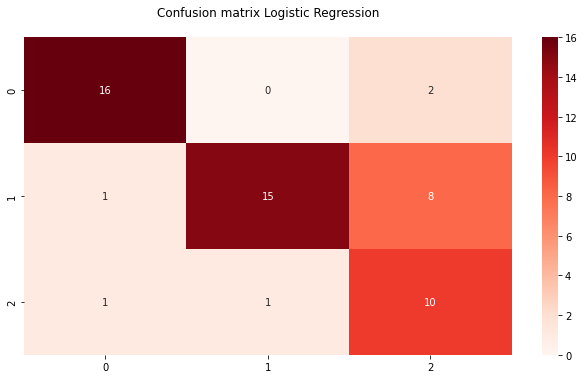

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
fig = plt.figure(figsize = (9,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test, y_predicted)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики` precision (точность)` и `recall (полнота)`.

![img](https://drive.google.com/uc?id=1hCJEmjKj0vjXPRdIyZKHQJOVxult2Mej)

**Precision** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

Чтобы понять значимость и важность точности и полноты для оценки модели, часто полезно рассматривать задачу прогнозирования как задачу поиска документов в базе данных с помощью запросов. Точность — это доля релевантных документов в списке, возвращаемом запросом. Полнота — это доля релевантных документов, возвращаемых поисковым механизмом, в общем количестве релевантных документов, которые могли бы быть возвращены.


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

precision, recall, thresholds = precision_recall_curve(y_scor.predict(X_test), Y_test)
precision, recall, thresholds

(array([0.25260417, 0.55725191, 1.        ]),
 array([1.        , 0.75257732, 0.        ]),
 array([0, 1]))

Даже притом, что точность и полнота определены для случая бинарной классификации, эти оценки всегда можно распространить на модель многоклассовой классификации. Для этого сначала нужно выбрать класс для оценивания. И затем считать все данные, принадлежащие выбранному классу, положительными, а все остальные данные — отрицательными.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

precision, recall, thresholds = roc_curve(y_test.ravel(), y_predicted.ravel())

## Общий показатель успеха (Overall Success Rate, OSR), или просто точность (Accuracy),

 это число правильно классифицированных наблюдений, отнесенное к общему числу наблюдений. Точность обычно используется, когда целью является ограничить количество ложных срабатываний (FP). Оценка правильности может пригодиться, когда одинаково важны ошибки в прогнозировании  всех  классов.

 ![img](https://drive.google.com/uc?id=1HsHGM_QYYwwDqxjQ3rsx5UftsDScceiq)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_score)
print(f"The accuracy score for method is: {round(acc,3)*100}%")


The accuracy score for method is: 78.60000000000001%


In [ ]:
# многоклассовая
acc = accuracy_score(y_test.argmax(axis=1), y_predicted.argmax(axis=1))
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

## Разберем как кривая ROC строится с нуля за три визуальных шага.



### Шаг 1: Получение прогнозов классификационной модели
Когда мы обучаем классификационную модель, мы получаем вероятность получения результата. В этом случае нашим примером будет вероятность погашения кредита (погасит кредит или нет).

![img](https://drive.google.com/uc?id=1U8JcE5tc5hmssY-UD6lNIVrha2tzsU63)

Вероятности обычно находятся в диапазоне от 0 до 1. Чем выше значение, тем больше вероятность того, что человек вернет кредит.

Следующий шаг - найти порог для классификации вероятностей как “окупится” (will repay) или “не окупится” (won't repay).

В примере на рисунке мы выбрали пороговое значение 0,35:

Все прогнозы, достигающие или превышающие этот порог, классифицируются как “окупятся”.

Все прогнозы ниже этого порога классифицируются как “не оправдаются”
Затем мы посмотрим, какие из этих прогнозов были правильно классифицированы или неправильно классифицированы. С такой информацией мы можем построить матрицу путаницы.

Все фактические положительные результаты **(actual positives)**, те, кто заплатил, отмечены синими точками.

Если они были классифицированы как “окупятся”, у нас есть истинный позитив **(TP)**

Если они были классифицированы как “не будут погашаться”, у нас есть ложноотрицательный результат **(FN)**

Все фактические негативы **(actual negatives)**, те, кто не заплатил, - это красные точки.

Если они были классифицированы как “не будут погашаться”, у нас есть истинное отрицательное значение **(TN)**

Если они были классифицированы как “будут погашены”, у нас есть ложноположительный результат **(FP)**

На рисунке мы можем увидеть краткое изложение:

![img](https://drive.google.com/uc?id=10vBMoxAu2ttr4mE6aglJOVcGlX1qnNEU)

### Шаг 2: Вычислите истинную положительную и ложную положительную частоту
К настоящему времени мы классифицировали все прогнозы и знаем, верны ли классификации или нет. С помощью этого мы рассчитаем следующие две метрики:

![img](https://drive.google.com/uc?id=1L074Ti2owS8xwU75PikmrT01iGitFlVI)

Истинный положительный показатель **(TPR)**: из всех людей, которые “возвращали” в прошлом, какой процент мы классифицировали правильно

Уровень ложноположительных результатов **(FPR)**: из всех людей, которые “не возвращали” в прошлом, какой процент мы пропустили -классифицировать


![img](https://drive.google.com/uc?id=1erR1r_X_wuuJJtvrBD6QBCVjva4-TJTw)

На графике мы можем видеть наш исходный пример при пороге 0.35.

На этом этапе

- мы правильно классифицировано 90% всех положительных результатов, те, кто “заплатил” (TPR)

- 40% всех негативов, которые “не окупились” (FPR), классифицируются как "промахи".

Мы можем заметить, что результаты для TPR и FPR уменьшаются по мере увеличения порога. Если мы посмотрим на первый вариант, где пороговое значение равно 0:

- Все положительные результаты были правильно классифицированы, поэтому TPR = 100%
- Все негативы были классифицированы по ошибке, следовательно, FPR = 100%

В последнем примере графика, где пороговое значение равно 1:

- Все положительные результаты были классифицированы без учета ошибок, поэтому TPR = 0%

- Все негативы были правильно классифицированы, следовательно, FPR = 0%

**В целом, мы видим, что это компромисс. По мере того, как мы увеличиваем наш порог, мы будем лучше классифицировать негативные моменты, но это происходит за счет того, что мы не классифицируем больше положительных моментов**

### Шаг 3: Нарисуем TPR и FPR для каждого отсечения
Чтобы построить кривую ROC, нам нужно рассчитать TPR и FPR для множества различных пороговых значений (этот шаг включен во все соответствующие библиотеки `scikit-learn`).

Для каждого порога мы наносим значение FPR по оси x и значение TPR по оси y. Затем мы соединяем точки линией. Вот и все!

Ниже на рисунке мы можем видеть, как каждая точка кривой ROC представляет FPR и TRP классификации при заданном пороговом значении.

Обратите внимание, как порог в 1 приводит к первой точке в (0, 0), а порог в 0 приводит к последней точке в (1, 1).

![img](https://drive.google.com/uc?id=13CvPSXGBbXGPFWjnZePqXoGGz84ExfBm)

Область, расположенная ниже линии, называется “Область под кривой (AUC)”. Это используется для оценки производительности модели классификации. Чем выше AUC, тем лучше модель различает классы.

Это означает, что в идеальном мире мы хотели бы, чтобы наша линия покрывала большую часть верхнего левого края графика, чтобы получить более высокий AUC.

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. **F-мера** — среднее гармоническое precision и recall :

![img](https://drive.google.com/uc?id=1a76fYrS2tOEE5j8HngWNsstw_9xYPGk7)

F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [ ]:
f1_score(Y_test, y_scor.predict(X_test), average='macro')

f1 = f1_score(Y_test, y_scor.predict(X_test))
print(f"The f1 score for method is: {round(f1,3)*100}%")


The f1 score for method is: 64.0%


## Чувствительность (или доля истинноположительных наблюдений)
определяется как отношение числа истинноположительных наблюдений к числу фактически положительных наблюдений.

![img](https://drive.google.com/uc?id=1M_najrqPfza8SriWa9FhVxT3s_fv_jZ3)

## Специфичность
определяется как отношение числа истинноотрицательных наблюдений к числу фактически отрицательных наблюдений.

![img](https://drive.google.com/uc?id=1y1oJ_N8xDkX0ko0fNB_omLdFdCQ0CaQa)

Минимизировать издержки ошибок бинарной классификации классификации можно с помощью выбора точки отсечения (Cut-Off Point) — порогового значения, разделяющего классы. Положительный исход в классификаторе обычно кодируется единицей, а отрицательный — нулем или -1.

При уменьшении порога отсечения увеличивается вероятность ошибочного распознавания положительных наблюдений (ложноположительных исходов), а при увеличении возрастает веро¬ятность неправильного распознавания отрицательных наблюдений (ложноотрица-тельных исходов). Цель заключается в том, чтобы подобрать такое значение точки отсечения, которое дает наибольшую точность распознавания заданного класса, а какого именно — определяется постановкой задачи. Для выбора точки отсечения в бинарной классификации применяется ROC анализ, основанный на построении характеристической кривой обнаружения — ROC кривой.

Чтобы построить ROC-кривую, нужно изменять порог отсечения в интервале от 0 (или от -1) до 1 с заданным шагом. В результате при каждом значении порога будет меняться количество правильно и неправильно распознанных примеров, а соответственно, чувствительность и специфичность модели. Для каждого порога рассчитывается чувствительность и специфичность, и строится график, по вертикальной оси которого откладывается чувствительность, а по горизонтальной — доля ложных положительных классификаций.


 ![img](https://drive.google.com/uc?id=1QTLwBcKsyLcs_xhstL_fQ3XPbldyoMRy)


Чтобы начертить ROC-кривую, сначала нужно дискретизировать диапазон оценок достоверности. Если для данной модели диапазон равен [0, 1], его можно дискретизировать следующим образом: [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]. Затем каждое дискретное значение используется в качестве порога при прогнозировании, с использованием модели, меток данных в наборе данных. Например, чтобы вычислить TPR и FPR для порога 0.7, нужно применить модель к каждому образцу, получить оценку достоверности, и, если оценка выше или равна 0.7, для этого образца выбирается положительный класс; иначе — отрицательный. При этом оптимальным будет значение, соответствующее точке ROC-кривой с координатами, максимально близкими к (0; 100), для которой и чувствительность, и специфичность равны 100 %, то есть как положительные, так и отрицательные примеры распознаны правильно.

Взгляните  на  рис.  7.5.  Легко  заметить,  что  для  порога  0  все  прогнозы  будут положительными, поэтому обе метрики, TPR и FPR, будут равны 1 (верхний правый угол). С другой стороны, для порога 1 положительные прогнозы невозможны, поэтому оценки TPR и FPR будут равны 0, что соответствует левому нижнему углу.

Чем больше площадь под ROC-кривой (area under ROC curve, AUC), тем эффективнее классификатор. Классификатор с AUC выше 0.5 лучше классификатора, действующего методом случайного выбора. Если AUC ниже 0.5, значит, с моделью что-то не так. Идеальный классификатор будет иметь AUC, равную 1. Обычно, имея хорошую модель, можно получить эффективный классификатор, выбирая значение порога, который дает значение TPR, близкое к 1, и удерживает значение FPR около 0.


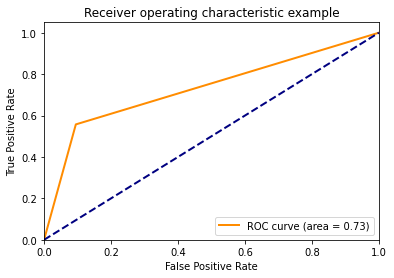

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(Y_test, y_scor.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Если стоит задача мультиклассификации, то ROC-кривая вычисляется следующим образом.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Загрузим набор данных Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Бинаризуем метки классов
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Обучим OneVsRestClassifier с LogisticRegression
classifier = OneVsRestClassifier(
    LogisticRegression(solver='lbfgs', random_state=0)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Вычислим ROC-кривую и AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Вычислить микро-среднюю кривую ROC и площадь под ROC
#Макросреднее значение вычислит метрику независимо для каждого класса, а затем возьмет среднее значение (следовательно, рассматривая все классы одинаково),
# в то время как микро-среднее значение объединит вклады всех классов для вычисления среднего показателя.
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Построим ROC-кривую
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Создайте текстовый отчет, показывающий основные метрики классификации.

In [ ]:
print(classification_report(y_true,y_pred,target_names=target_names))

# Оценка качества кластеризации

Оценка производительности алгоритма кластеризации не так тривиальна, как подсчет количества ошибок или точности и отзыва контролируемого алгоритма классификации. В частности, любая метрика оценки должна учитывать не абсолютные значения меток кластера, а, скорее, если эта кластеризация определяет разделения данных, аналогичные некоторому основному набору истинных классов или удовлетворяющему некоторому предположению, так что члены, принадлежащие к одному классу, более похожи чем члены разных классов в соответствии с некоторой метрикой сходства.

Принято выделять две группы методов оценки качества кластеризации:

•	Внешние (англ. External) меры основаны на сравнении результата кластеризации с априори известным разделением на классы.

•	Внутренние (англ. Internal) меры отображают качество кластеризации только по информации в данных.

## Индекс Rand.
Учитывая знания о назначениях базовых классов истинности labels_true и назначениях нашим алгоритмом кластеризации одних и тех же выборок labels_pred, (скорректированный или нескорректированный) индекс Рэнда — это функция, которая измеряет сходство двух назначений, игнорируя перестановки. Индекс Rand оценивает, насколько много из тех пар элементов, которые находились в одном классе, и тех пар элементов, которые находились в разных классах, сохранили это состояние после кластеризации алгоритмом.

![img](https://drive.google.com/uc?id=1nY-RCLK5rojj-o8D2XoHDL0VBzqJtJGl)

Имеет область определения от 0 до 1, где 1 — полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений.

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

Плохо согласованные ярлыки (например, независимые ярлыки) имеют более низкие оценки, а для скорректированного индекса Rand оценка будет отрицательной или близкой к нулю. Индекс Rand, 1,0 — это оценка идеального соответствия.

## Индекс Фоулкса – Мэллова
используется для определения сходства между двумя кластерами.

![img](https://drive.google.com/uc?id=1vS3MF-7aRoO7FKcOsZ9Mgr7BCbyCbn50)

Более высокое значение индекса означает большее сходство между кластерами. Этот индекс также хорошо работает на зашумленных данных. Оценка варьируется от 0 до 1. Высокое значение указывает на хорошее сходство между двумя кластерами. Идеальная маркировка оценивается в 1,0

In [ ]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.4714045207910317

## Коэффициент силуэта.

Если наземные метки достоверности неизвестны, оценка должна выполняться с использованием самой модели. Коэффициент силуэта (sklearn.metrics.silhouette_score) является примером такой оценки, где более высокий показатель коэффициента силуэта относится к модели с лучше определенными кластерами. Коэффициент силуэта определяется для каждого образца и состоит из двух баллов:

a : Среднее расстояние между образцом и всеми другими точками того же класса.

b : Среднее расстояние между образцом и всеми другими точками в следующем ближайшем кластере.

Тогда коэффициент силуэта s для одного образца определяется как:

![img](https://drive.google.com/uc?id=1HiYy09d8xt_0-BB9marWaHaGILxKOwI5)

Коэффициент силуэта для набора образцов дается как среднее значение коэффициента силуэта для каждого образца.

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

X, y = datasets.load_iris(return_X_y=True)
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')


0.5528190123564095

При обычном использовании коэффициент силуэта применяется к результатам кластерного анализа. Оценка ограничена от -1 за неправильную кластеризацию до +1 за высокоплотную кластеризацию. Баллы около нуля указывают на перекрывающиеся кластеры. Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера.

## Индекс Калински-Харабаса.
Если наземные метки достоверности неизвестны, индекс Калински-Харабаса (`sklearn.metrics.calinski_harabasz_score`) — также известный как критерий отношения дисперсии — можно использовать для оценки модели, где более высокий балл Калински-Харабаса относится к модели с более определенными кластерами.

Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний). При обычном использовании индекс Калински-Харабаса применяется к результатам кластерного анализа:


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

X, y = datasets.load_iris(return_X_y=True)
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)


561.62775662962

## Индекс Дэвиса-Болдина.
Если наземные метки истинности неизвестны, для оценки модели можно использовать индекс Дэвиса-Болдина (sklearn.metrics.davies_bouldin_score), где более низкий индекс Дэвиса-Болдина относится к модели с лучшим разделением между кластерами.

Этот индекс означает среднее «сходство» между кластерами, где сходство — это мера, которая сравнивает расстояние между кластерами с размером самих кластеров.
Ноль — это наименьший возможный результат. Значения, близкие к нулю, указывают на лучшее разделение.
Вычисление Дэвиса-Боулдина проще, чем оценка Силуэта. В индексе вычисляются только количества и характеристики, присущие набору данных.


In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

iris = datasets.load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)


0.6619715465007465

Матрица непредвиденных обстоятельств (`sklearn.metrics.cluster.contingency_matrix`) сообщает мощность пересечения для каждой истинной / прогнозируемой пары кластеров. Матрица непредвиденных обстоятельств обеспечивает достаточную статистику для всех метрик кластеризации, где выборки независимы и одинаково распределены, и нет необходимости учитывать некоторые экземпляры, которые не были кластеризованы. Вот пример:

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
x = ["a", "a", "a", "b", "b", "b"]
y = [0, 0, 1, 1, 2, 2]
contingency_matrix(x, y)


array([[2, 1, 0],
       [0, 1, 2]])

Первая строка выходного массива указывает, что есть три образца, истинный кластер которых равен «a». Из них два находятся в предсказанном кластере 0, один — в 1 и ни один — в 2. И вторая строка указывает, что есть три выборки, истинный кластер которых равен «b». Из них ни один не находится в прогнозируемом кластере 0, один — в 1, а два — в 2.

Матрица неточностей для классификации является квадратной матрицей непредвиденной где порядок строк и столбцов соответствует списку классов.


## Матрица неточности пар.
Матрица смешения пар (`sklearn.metrics.cluster.pair_confusion_matrix`) представляет собой матрицу подобия 2×2

![img](https://drive.google.com/uc?id=1g5f-rw_YUJUwUpg2M4mo-cVI0v1oE6gN)

между двумя кластерами, вычисленными путем рассмотрения всех пар выборок и подсчета пар, которые назначены в один и тот же или в разные кластеры в рамках истинной и прогнозируемой кластеризации.
В нем есть следующие записи:

$C_{0}$: количество пар с обеими кластерами, в которых образцы не сгруппированы вместе

$C_{10}$: количество пар с истинной кластеризацией меток, в которых образцы сгруппированы вместе, но в другой кластеризации образцы не сгруппированы вместе

$C_{01}$: количество пар с истинной кластеризацией меток, в которых образцы не сгруппированы вместе, а другая кластеризация содержит образцы, сгруппированные вместе

$C_{11}$: количество пар с обеими кластерами, имеющими образцы, сгруппированные вместе

Если рассматривать пару образцов, сгруппированных вместе как положительную пару, то, как и в бинарной классификации, количество истинных отрицательных значений равно $C_{00}$ ,  ложноотрицательные $C_{10}$, истинные положительные стороны $C_{11}$  а ложные срабатывания $C_{01}$.
Идеально совпадающие метки имеют все ненулевые записи на диагонали независимо от фактических значений меток:


In [ ]:
from sklearn.metrics.cluster import pair_confusion_matrix
pair_confusion_matrix([0, 0, 1, 1], [0, 0, 1, 1])


array([[8, 0],
       [0, 4]])

## Пример многоклассовой классификации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
#%%
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# создаем битовую маску
y = label_binarize(y, classes=[0,1,2  ])
n_classes = y.shape[1]
#%%
y, X

(array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 

In [ ]:
#%%
# разбиваем на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [ ]:
from sklearn.multioutput import ClassifierChain

base_lr = LogisticRegression(solver='lbfgs', random_state=0)
chain = ClassifierChain(base_lr, order='random', random_state=0)
pred=chain.fit(X_train, y_train).predict(X_test)
pred


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [ ]:
# Это простая стратегия расширения классификаторов, которые изначально не поддерживают многоцелевую классификацию (например Логистическая регрессия)
classifier = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_train)
pred=classifier.predict(X_test)
#%%
pred

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

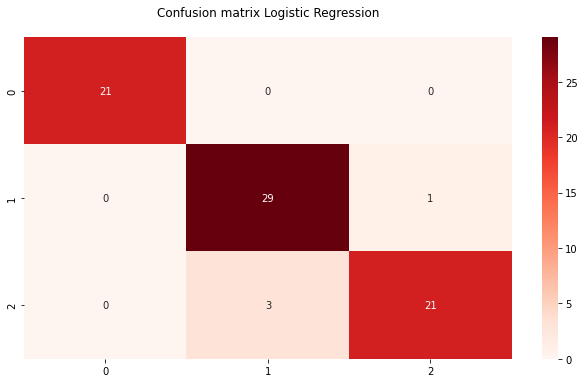

In [ ]:
# матрица неточности
# настаиваем размер графика
fig = plt.figure(figsize = (9,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [ ]:
#%%
# доля правильных ответов алгоритма: Точность = (истинное положительное + истинно отрицательное значение) / всего
acc = accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1))
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")
#%%

The accuracy score for LogReg is: 94.69999999999999%


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = roc_curve(y_test.ravel(), pred.ravel())
recall

array([0.        , 0.94666667, 1.        ])

In [ ]:
# вычисляем roc-кривую и auc-площадь для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Вычислить микро-среднюю кривую ROC и площадь под ROC
#Макросреднее значение вычислит метрику независимо для каждого класса, а затем возьмет среднее значение (следовательно, рассматривая все классы одинаково),
# в то время как микро-среднее значение объединит вклады всех классов для вычисления среднего показателя.
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#%%
roc_auc["micro"]
#%%

0.9600000000000001

In [ ]:
fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#%%
roc_auc["macro"]
#%%

0.9600000000000001

In [ ]:
fpr
#%%

{0: array([0., 0., 1.]),
 1: array([0.        , 0.06666667, 1.        ]),
 2: array([0.        , 0.01960784, 1.        ]),
 'micro': array([0.        , 0.02666667, 1.        ]),
 'macro': array([0.        , 0.02666667, 1.        ])}

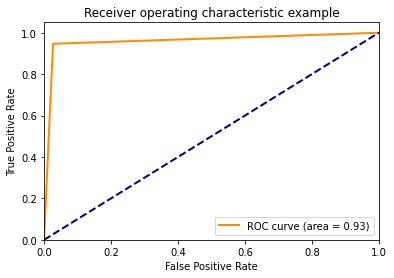

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr['micro'],tpr['micro'],color="darkorange",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc[2],)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
#%%